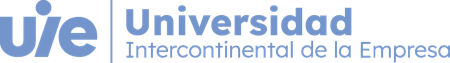

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# Preprocesamiento extra para el modelo de clasificación

In [9]:
# Importamos las librerías necesarias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [10]:
input_data_file = "proy_supermercado_dev_preprocesado_base.csv"
output_data_file = "proy_supermercado_dev_preprocesado_clasificacion.csv"

In [11]:
datos = pd.read_csv(input_data_file)

display(datos)

,educacion,ingresos,hijos_casa,adolescentes_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,...,intensidad_compra,campanas_totales,estado_civil_Alone,estado_civil_Desconocido,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,estado_civil_Together,estado_civil_Widow,estado_civil_YOLO
0,3.0,53359.0,1.0,1.0,4.0,173.0,4.0,30.0,3.0,6.0,...,2.000000,0,0,0,0,1,0,0,0,0
1,3.0,21474.0,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,...,6.000000,1,0,0,0,0,1,0,0,0
2,3.0,41411.0,0.0,0.0,11.0,37.0,32.0,38.0,11.0,3.0,...,0.583333,0,0,0,1,0,0,0,0,0
3,5.0,64504.0,1.0,2.0,81.0,986.0,36.0,168.0,16.0,0.0,...,0.219512,0,0,0,0,0,0,1,0,0
4,3.0,65169.0,0.0,0.0,23.0,1074.0,0.0,69.0,0.0,0.0,...,1.125000,4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,3.0,19419.0,1.0,0.0,76.0,2.0,14.0,28.0,16.0,3.0,...,0.090909,0,0,0,0,1,0,0,0,0
1813,3.0,43602.0,1.0,1.0,45.0,19.0,5.0,12.0,10.0,3.0,...,0.130435,0,0,0,0,0,1,0,0,0
1814,3.0,24639.0,1.0,1.0,3.0,20.0,3.0,16.0,0.0,4.0,...,1.500000,0,0,0,0,1,0,0,0,0
1815,3.0,90000.0,0.0,0.0,91.0,675.0,144.0,133.0,94.0,192.0,...,0.184783,3,0,0,0,1,0,0,0,0


In [12]:
# Ver distribución actual
print("Distribución actual del target:")
print(datos['respuesta'].value_counts())
print(f"\nPorcentaje clase positiva: {datos['respuesta'].mean()*100:.2f}%")
print(f"Ratio: {datos['respuesta'].value_counts()[0] / datos['respuesta'].value_counts()[1]:.1f}:1")

Distribución actual del target:
respuesta
0.0    1547
1.0     270
Name: count, dtype: int64

Porcentaje clase positiva: 14.86%
Ratio: 5.7:1


In [13]:
# Definimos la variable objetivo
target_col = "respuesta"
feature_cols = [col for col in datos.columns if col != target_col]

In [14]:
# Construimos X e y
import sklearn
TEST_SPLIT = 0.3

X = datos[feature_cols].copy()
y = datos[target_col]

# División train-test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=TEST_SPLIT, random_state=42, stratify=y
)

C:\Users\carid\AppData\Local\Temp\ipykernel_11184\560426465.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')


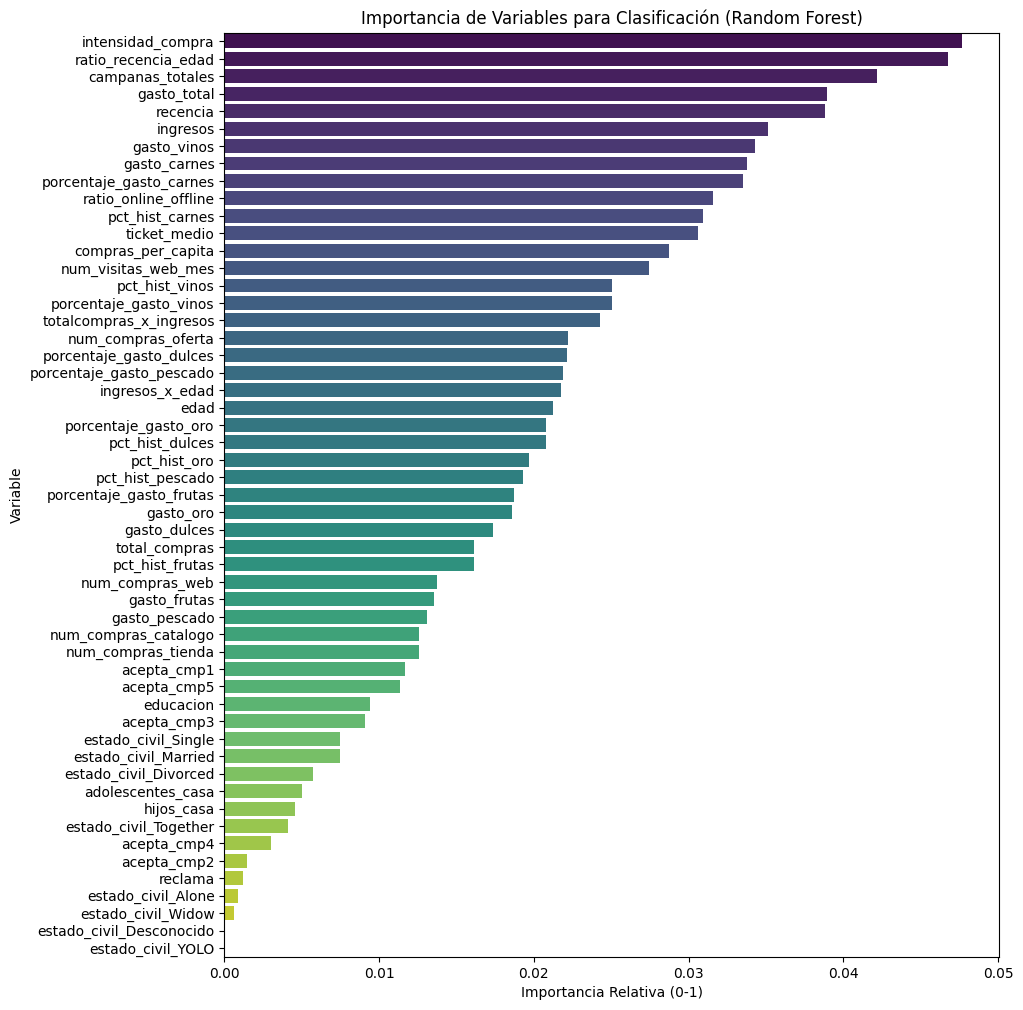

Variables que aportan menos del 1.0%: 15
['educacion', 'acepta_cmp3', 'estado_civil_Single', 'estado_civil_Married', 'estado_civil_Divorced', 'adolescentes_casa', 'hijos_casa', 'estado_civil_Together', 'acepta_cmp4', 'acepta_cmp2', 'reclama', 'estado_civil_Alone', 'estado_civil_Widow', 'estado_civil_Desconocido', 'estado_civil_YOLO']


In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar un Random Forest rápido solo para esto

rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train, y_train)

#  Extraer la importancia de las variables
importancias = rf_selector.feature_importances_
nombres_variables = X_train.columns

# Crear un DataFrame para visualizarlo mejor
df_importancia = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(10, 12)) # Hacemos el gráfico alto para que quepan todas
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')
plt.title('Importancia de Variables para Clasificación (Random Forest)')
plt.xlabel('Importancia Relativa (0-1)')
plt.show()

# Ver las variables que aportan MENOS de un umbral 
umbral = 0.01
vars_basura = df_importancia[df_importancia['Importancia'] < umbral]['Variable'].tolist()

print(f"Variables que aportan menos del {umbral*100}%: {len(vars_basura)}")
print(vars_basura)


In [16]:
datos.to_csv(output_data_file, index=False)